# The Steinhaus Space

Let's take a look at this in Lean and then we will pick it apart to see what it all means.  

At the highest level description, the **Steinhaus space** is a **probability space**

$$(\Omega,{\mathscr A},P) = ([0,1], {\mathscr B}([0,1]), \lambda\restriction_{[0,1]})$$

where the **sample space** $\Omega$ is the **closed unit interval**

$$[0,1] = \{x : 0 \leq x \leq 1\}$$

and ${\mathscr A}$ is the **$\sigma$-algebra generated by $[0,1]$**

and $\lambda\restriction_{[0,1]}$ is the **Lebesgue measure** restricted to $[0,1]$ such that

$$\lambda([a,b]) = b-a$$

In [Lean]():

When you click on the link, a web page will come up with two panes, an edit window and an "info window". 

Lean will be orange at the top and eventually green.  Unfortunately, for this particular page, it may stay orange for a very long time.  On my home PC, which is an Intel core i9 PC with a lot of memory, it took 20 seconds to load.  I wasn't able to get this particular page to go to green on my work PC.  So it may or may not work for you.  But we will break it down into smaller pieces which will work.

Also, underneath, for this example, we are look at the real numbers.  The real numbers have a rather complicated construction called the Dedekind cuts.  This whole construction is encoded in the Lean [mathlib](https://leanprover-community.github.io/mathlib_docs/).  For completeness' sake, we will probably get into it.  But we can work with a much simpler domain, such as the singleton set $\{0\}$, which will take less time to process.

So that's our study plan

* We will take a brief tour of this very slow and intractable page
* We will replace this page will a simpler example involving a very simple finite set
* For the simpler example we will drill down to all the nitty gritty definitions
* Then we will come back to the reals and take the grand tour of the Dedekind cuts and Lebesgue measure and Lebesgue integral and all that stuff

So step 1, the brief tour of this page.  When we say `#check Steinhaus`, and Lean comes back with `probability_space ↥I01`, what we have established is that

* There is a proof
* Which checks
* That $[0,1]$ taken together with $\lambda\restriction_{[0,1]}$ is a **measure space**, and this **measure** is a **probability space**

In the code, $[0,1]$ is referred to as `I01`.  `I01` is defined as

`abbreviation I01 := (set.Icc (0 : ℝ) 1)`

OK so what is `set.Icc`?  It is [defined in Lean](https://github.com/leanprover-community/mathlib/blob/4e8486b807bec6f7e6f9d353e71ffaae630e8a9e/src/data/set/intervals/basic.lean#L47) as the set:

`/-- Left-closed right-closed interval -/
def Icc (a b : α) := {x | a ≤ x ∧ x ≤ b}`

and in particular we have fixed the type `α` to be the real numbers ℝ by setting `a` to be `0 : ℝ`.  This says I am looking for the `0` in the real numbers.  Since `b` is the same type as `a`, Lean's type inference mechanism infers that `b` is also real, and we get the real interval $[a,b]=[0,1]={x | 0 ≤ x ∧ x ≤ 1}$.  So a lot of what Lean does can be summarized as 

* Type inference
* Term rewriting

OK so let's keep unpacking this.  We now need to know what we mean by

* Probability space
* Probability measure
* Measure space
* Measure

We will cover these concepts in exactly the wrong order: backwards.  I'm doing so on the assumption that you've probably kind of been here before.  We are going backwards because, at this stage, we are more interested in the Lean journey than the precise specifics of the definitional destination (although we do care about both).  So we will walk backward to see what it all means, and then we will walk forward with the singleton set example to set things in order again and go to a deeper level of detail tracing through how things work in the forward direction.

Working backwards, we see that `Steinhaus` is an **instance** of `probability_space`:

`
instance Steinhaus : probability_space I01 := 
{ is_probability_measure := P_I01 }
`
and this instance has probability measure `P_I01`.

What is means to be an "instance" in Lean is fairly complicated.  An instance is a type, and it is a more specific version of a more general type.  The more general type is called a "type class".  To learn this and many more details, please read and interact with [Theorem Proving in Lean](https://leanprover.github.io/theorem_proving_in_lean/), in your free time.  (In particular, chapter 10 for type classes.)  It's well worth the journey.  I won't emphasize many of the fine-grained details you can see there.  I will stick with the big picture for this discussion.  Suffice it to say that, when a `probability_space` is needed, the type inference mechanism of Lean will look for instances of that type which have been constructed, which will fit into the context where the instance is being called for.

A **probability space** is described by

```
class probability_space (α : Type*) extends measure_space α :=
(is_probability_measure:  probability_measure volume)
```

What this says is that a `probability_space` is a `measure_space` with a **measure** (called `volume`) which is a `probability_measure`.

A **probability measure** is described by

```
/-- A measure `μ` is called a probability measure if `μ univ = 1`. -/
class probability_measure (μ : measure α) : Prop := (measure_univ : μ univ = 1)
```

What this says is that if $(X,\mu)$ is the measure space, with **carrier set** $X$ and **measure** $\mu$ (which operates on *sets*; recall that $[0,1]$ is a set), is such that

$$\mu(X) = 1$$

That's all it says.  It's really easy.  And the rest will be really easy!

Carrying on, we declared above that `probability_space` **extends** `measure_space`.  So it is a kind of measure space, which means that all of the properties of a measure space hold for a probability space,  plus the extra property $\mu(X)=`$ that we just added.  These properties are declared as follows:

```
/-- A measure space is a measurable space equipped with a
  measure, referred to as `volume`. -/
class measure_space (α : Type*) extends measurable_space α :=
(volume : measure α)
```

So a **measure space** is

* A **measurable space** with
* A **measure**, called `volume` for purposes of discussion

Let's define `measurable_space` $\Sigma$ first, before we say how we `measure` it.  A `measurable_space` is declared as

```
/-- A measurable space is a space equipped with a σ-algebra. -/
structure measurable_space (α : Type*) :=
(is_measurable' : set α → Prop)
(is_measurable_empty : is_measurable' ∅)
(is_measurable_compl : ∀ s, is_measurable' s → is_measurable' sᶜ)
(is_measurable_Union : ∀ f : ℕ → set α, (∀ i, is_measurable' (f i)) → is_measurable' (⋃ i, f i))
```

So there is a carrier set $X$ of type $\alpha$.  We say that there is a $\sigma$-algebra on subsets of $X$.  What that means is defined by 3 axioms and a function `is_measurable'(S)` which says whether a particular set $S$ is in the measurable space or not.  (Also note that the `'` in `is_measurable'` has no special significance, it is a character that you can throw into any name as part of the name, so like $a, a^\prime$, just two slightly different named things.)  The 3 axioms are for inclusion in the measurable space $\Sigma$ are:
|
* `is_measurable' ∅`: The empty set $\emptyset \in \Sigma$.
* `∀ s, is_measurable' s → is_measurable' sᶜ`: For all $S \subseteq X$, if $S \in \Sigma$ then $(X \setminus S) \in \Sigma$.  Typically phrased as "closed under complement".
* `∀ f : ℕ → set α, (∀ i, is_measurable' (f i)) → is_measurable' (⋃ i, f i))`.  let ${\mathscr F} = (F_1,F_2,\ldots)$ be a countable family of subsets $F_i \subseteq X$.  If every $F_i \in \Sigma$, then the countable union $\bigcup_{i\geq 0} F_i \in \Sigma$.  This can be phrased as "closed under countable unions".

The convention in mathematical writing is to call $(X,\Sigma)$ a **measurable space** and to call $\Sigma$ alone a **$\sigma$-algebra**.  To all intents and purposes (and in Lean's implementation in particular), the notions of measurable space and $\sigma$-algebra are synonymous.

#### measure
A measure is defined to be an outer measure that is countably additive on
measurable sets, with the additional assumption that the outer measure is the canonical
extension of the restricted measure. 
```
structure measure (α : Type*) [measurable_space α] extends outer_measure α :=
(m_Union ⦃f : ℕ → set α⦄ :
  (∀i, is_measurable (f i)) → pairwise (disjoint on f) →
  measure_of (⋃i, f i) = (∑'i, measure_of (f i)))
(trimmed : to_outer_measure.trim = to_outer_measure)
```
So a **measure** is defined on a measurable space to be

* An **outer measure** which is **countably additive on measurable sets**, or should I say **additive on countable families of measurable sets**:

```
⦃f : ℕ → set α⦄ : (∀i, is_measurable (f i)) → pairwise (disjoint on f)
```

* Such that the outer measure is the **canonical extension** of the **restricted measure**

```
to_outer_measure.trim = to_outer_measure
```

There's a lot to climb into here.  First, since we are saying `measure` extends `outer_measure`, we need to say what a `outer_measure` is to understand the rest of it. 

#### outer_measure
An outer measure is a countably subadditive monotone function that sends `∅` to `0`
```
structure outer_measure (α : Type*) :=
(measure_of : set α → ennreal)
(empty : measure_of ∅ = 0)
(mono : ∀{s₁ s₂}, s₁ ⊆ s₂ → measure_of s₁ ≤ measure_of s₂)
(Union_nat : ∀(s:ℕ → set α), measure_of (⋃i, s i) ≤ (∑'i, measure_of (s i)))
```

In other words, an outer measure $\mu$ is:
* `set α → ennreal`: A function from subsets of $X$ to the **extended non-negative reals**
* `measure_of ∅ = 0`: Which takes the empty set to 0
* `∀{s₁ s₂}, s₁ ⊆ s₂ → measure_of s₁ ≤ measure_of s₂`: Is **monotone**, so if $A \subseteq B$ then $\mu(A) \leq \mu(B)$

* `∀(s:ℕ → set α), measure_of (⋃i, s i) ≤ (∑'i, measure_of (s i))`: Is **countably subadditive**, so 

$$\mu(\bigcup_{i\geq 0} F_i) \leq \sum_{i_\geq 0} \mu(F_i)$$

where `ennreal` $ = [0,\infty]$, the type of non-negative reals plus $\infty$ so $\{x : x \in ℝ \land x \geq 0\} \bigcup \{\infty\}$, is declared as

```
/-- The extended nonnegative real numbers. This is usually denoted [0, ∞],
  and is relevant as the codomain of a measure. -/
@[derive canonically_ordered_comm_semiring, derive complete_linear_order, derive densely_ordered,
  derive nontrivial]
def ennreal := with_top ℝ≥0
```
and the definition notes that $[0,\infty]$ is

* `canonically_ordered_comm_semiring`: A canonically order commutative semiring
* `complete_linear_order`: Has a complete linear order
* `densely_ordered`: Is densely ordered
* `nontrivial`: Is nontrivial

Let's chase these down, and then get back to `measure` after that. These are all basic abstract algebra concepts. I will do a depth-first traversal, because there's a ton of these. To make these easier I will sort them earliest to latest:

#### +
```
class has_add      (α : Type u) := (add : α → α → α)
```

#### add_semigroup
An additive semigroup is a type with an associative `(+)`.
```
@[protect_proj, ancestor has_add] class add_semigroup (G : Type u) extends has_add G :=
(add_assoc : ∀ a b c : G, a + b + c = a + (b + c))
```

#### *
```
class has_mul      (α : Type u) := (mul : α → α → α)
```

#### semigroup
A semigroup is a type with an associative `(*)`. 
```
@[protect_proj, ancestor has_mul] class semigroup (G : Type u) extends has_mul G :=
(mul_assoc : ∀ a b c : G, a * b * c = a * (b * c))
```

#### 1
```
class has_one      (α : Type u) := (one : α)
```

#### monoid
A `monoid` is a `semigroup` with an element `1` such that `1 * a = a * 1 = a`.
```
@[ancestor semigroup has_one]
class monoid (M : Type u) extends semigroup M, has_one M :=
(one_mul : ∀ a : M, 1 * a = a) (mul_one : ∀ a : M, a * 1 = a)
```

#### 0
```
class has_zero     (α : Type u) := (zero : α)
```

#### mul_zero_class
Typeclass for expressing that a type `M₀` with multiplication and a zero satisfies
`0 * a = 0` and `a * 0 = 0` for all `a : M₀`.
```
@[protect_proj, ancestor has_mul has_zero]
class mul_zero_class (M₀ : Type*) extends has_mul M₀, has_zero M₀ :=
(zero_mul : ∀ a : M₀, 0 * a = 0)
(mul_zero : ∀ a : M₀, a * 0 = 0)
```

#### add_monoid
An `add_monoid` is an `add_semigroup` with an element `0` such that `0 + a = a + 0 = a`.
```
@[ancestor add_semigroup has_zero]
class add_monoid (M : Type u) extends add_semigroup M, has_zero M :=
(zero_add : ∀ a : M, 0 + a = a) (add_zero : ∀ a : M, a + 0 = a)
attribute [to_additive] monoid
```

#### $\leq, <$
```
class has_le       (α : Type u) := (le : α → α → Prop)
class has_lt       (α : Type u) := (lt : α → α → Prop)
```

#### preorder
A preorder is a reflexive, transitive relation `≤` with `a < b` defined in the obvious way.
```
class preorder (α : Type u) extends has_le α, has_lt α :=
(le_refl : ∀ a : α, a ≤ a)
(le_trans : ∀ a b c : α, a ≤ b → b ≤ c → a ≤ c)
(lt := λ a b, a ≤ b ∧ ¬ b ≤ a)
(lt_iff_le_not_le : ∀ a b : α, a < b ↔ (a ≤ b ∧ ¬ b ≤ a) . order_laws_tac)
```

#### partial_order
A partial order is a reflexive, transitive, antisymmetric relation `≤`.
```
class partial_order (α : Type u) extends preorder α :=
(le_antisymm : ∀ a b : α, a ≤ b → b ≤ a → a = b)
```

#### has_bot
Typeclass for the `⊥` (`\bot`) notation
```
class has_bot (α : Type u) := (bot : α)
```

#### has_top
Typeclass for the `⊤` (`\top`) notation
```
class has_top (α : Type u) := (top : α)
```

#### order_bot
An `order_bot` is a partial order with a minimal element.  (We could state this on preorders, but then it wouldn't be unique so distinguishing one would seem odd.)
```
class order_bot (α : Type u) extends has_bot α, partial_order α :=
(bot_le : ∀ a : α, ⊥ ≤ a)
```

#### order_top
An `order_top` is a partial order with a maximal element.
  (We could state this on preorders, but then it wouldn't be unique
  so distinguishing one would seem odd.)
```
class order_top (α : Type u) extends has_top α, partial_order α :=
(le_top : ∀ a : α, a ≤ ⊤)
```

#### add_comm_semigroup
A commutative additive semigroup is a type with an associative commutative `(+)`.
```
@[protect_proj, ancestor add_semigroup]
class add_comm_semigroup (G : Type u) extends add_semigroup G :=
(add_comm : ∀ a b : G, a + b = b + a)
attribute [to_additive] comm_semigroup
```

#### add_comm_monoid
An additive commutative monoid is an additive monoid with commutative `(+)`. 
```
@[protect_proj, ancestor add_monoid add_comm_semigroup]
class add_comm_monoid (M : Type u) extends add_monoid M, add_comm_semigroup M
```

#### ordered_add_comm_monoid 
An ordered (additive) commutative monoid is a commutative monoid  with a partial order such that
* `a ≤ b → c + a ≤ c + b` (addition is monotone)
* `a + b < a + c → b < c`.
```
@[protect_proj, ancestor add_comm_monoid partial_order]
class ordered_add_comm_monoid (α : Type*) extends add_comm_monoid α, partial_order α :=
(add_le_add_left       : ∀ a b : α, a ≤ b → ∀ c : α, c + a ≤ c + b)
(lt_of_add_lt_add_left : ∀ a b c : α, a + b < a + c → b < c)
```

#### canonically_ordered_add_monoid 
A canonically ordered additive monoid is an ordered commutative additive monoid in which the ordering coincides with the divisibility relation, which is to say, `a ≤ b` iff there exists `c` with `b = a + c`.  This is satisfied by the natural numbers, for example, but not the integers or other ordered groups.
```
@[protect_proj]
class canonically_ordered_add_monoid (α : Type*) extends ordered_add_comm_monoid α, order_bot α :=
(le_iff_exists_add : ∀a b:α, a ≤ b ↔ ∃c, b = a + c)
```

#### canonically_ordered_comm_semiring
A canonically ordered commutative semiring is an ordered, commutative semiring
in which `a ≤ b` iff there exists `c` with `b = a + c`. This is satisfied by the
natural numbers, for example, but not the integers or other ordered groups.
```
class canonically_ordered_comm_semiring (α : Type*) extends
  canonically_ordered_add_monoid α, comm_semiring α :=
(eq_zero_or_eq_zero_of_mul_eq_zero : ∀ a b : α, a * b = 0 → a = 0 ∨ b = 0)
```

#### monoid_with_zero
A type `M` is a “monoid with zero” if it is a monoid with zero element, and `0` is left
and right absorbing.
```
@[protect_proj] class monoid_with_zero (M₀ : Type*) extends monoid M₀, mul_zero_class M₀.
```

#### distrib
A typeclass stating that multiplication is left and right distributive
over addition. 
```
@[protect_proj, ancestor has_mul has_add]
class distrib (R : Type*) extends has_mul R, has_add R :=
(left_distrib : ∀ a b c : R, a * (b + c) = (a * b) + (a * c))
(right_distrib : ∀ a b c : R, (a + b) * c = (a * c) + (b * c))
```

#### semiring
A semiring is a type with the following structures: additive commutative monoid
(`add_comm_monoid`), multiplicative monoid (`monoid`), distributive laws (`distrib`), and
multiplication by zero law (`mul_zero_class`). The actual definition extends `monoid_with_zero`
instead of `monoid` and `mul_zero_class`. 
```
@[protect_proj, ancestor add_comm_monoid monoid_with_zero distrib]
class semiring (α : Type u) extends add_comm_monoid α, monoid_with_zero α, distrib α
```

#### comm_monoid
A commutative monoid is a monoid with commutative `(*)`.
```
@[protect_proj, ancestor monoid comm_semigroup]
class comm_monoid (M : Type u) extends monoid M, comm_semigroup M
```

#### comm_semiring
A commutative semiring is a `semiring` with commutative multiplication. In other words, it is a
type with the following structures: additive commutative monoid (`add_comm_monoid`), multiplicative
commutative monoid (`comm_monoid`), distributive laws (`distrib`), and multiplication by zero law
(`mul_zero_class`).
```
@[protect_proj, ancestor semiring comm_monoid]
class comm_semiring (α : Type u) extends semiring α, comm_monoid α
```

#### has_sup
Typeclass for the `⊔` (`\lub`) notation
```
class has_sup (α : Type u) := (sup : α → α → α)
```

#### has_inf
Typeclass for the `⊓` (`\glb`) notation 
```
class has_inf (α : Type u) := (inf : α → α → α)
```

#### semilattice_sup
A `semilattice_sup` is a join-semilattice, that is, a partial order
  with a join (a.k.a. lub / least upper bound, sup / supremum) operation
  `⊔` which is the least element larger than both factors.
```
class semilattice_sup (α : Type u) extends has_sup α, partial_order α :=
(le_sup_left : ∀ a b : α, a ≤ a ⊔ b)
(le_sup_right : ∀ a b : α, b ≤ a ⊔ b)
(sup_le : ∀ a b c : α, a ≤ c → b ≤ c → a ⊔ b ≤ c)
```

#### semilattice_inf
A `semilattice_inf` is a meet-semilattice, that is, a partial order
  with a meet (a.k.a. glb / greatest lower bound, inf / infimum) operation
  `⊓` which is the greatest element smaller than both factors.
```
class semilattice_inf (α : Type u) extends has_inf α, partial_order α :=
(inf_le_left : ∀ a b : α, a ⊓ b ≤ a)
(inf_le_right : ∀ a b : α, a ⊓ b ≤ b)
(le_inf : ∀ a b c : α, a ≤ b → a ≤ c → a ≤ b ⊓ c)
```

#### lattice
A lattice is a join-semilattice which is also a meet-semilattice.
```
class lattice (α : Type u) extends semilattice_sup α, semilattice_inf α
```

#### bounded_lattice
A bounded lattice is a lattice with a top and bottom element,
  denoted `⊤` and `⊥` respectively. This allows for the interpretation
  of all finite suprema and infima, taking `inf ∅ = ⊤` and `sup ∅ = ⊥`. 
```
class bounded_lattice (α : Type u) extends lattice α, order_top α, order_bot α
```

#### Sup
```
class has_Sup (α : Type*) := (Sup : set α → α)
```

#### Inf
```
/-- class for the `Inf` operator -/
class has_Inf (α : Type*) := (Inf : set α → α)
```

#### complete_lattice
A complete lattice is a bounded lattice which has suprema and infima for every subset.
```
class complete_lattice (α : Type*) extends bounded_lattice α, has_Sup α, has_Inf α :=
(le_Sup : ∀s, ∀a∈s, a ≤ Sup s)
(Sup_le : ∀s a, (∀b∈s, b ≤ a) → Sup s ≤ a)
(Inf_le : ∀s, ∀a∈s, Inf s ≤ a)
(le_Inf : ∀s a, (∀b∈s, a ≤ b) → a ≤ Inf s)
```

#### linear_order
A linear order is reflexive, transitive, antisymmetric and total relation `≤`.
We assume that every linear ordered type has decidable `(≤)`, `(<)`, and `(=)`. 
````
class linear_order (α : Type u) extends partial_order α :=
(le_total : ∀ a b : α, a ≤ b ∨ b ≤ a)
(decidable_le : decidable_rel (≤))
(decidable_eq : decidable_eq α := @decidable_eq_of_decidable_le _ _ decidable_le)
(decidable_lt : decidable_rel ((<) : α → α → Prop) :=
    @decidable_lt_of_decidable_le _ _ decidable_le)
````

#### complete_linear_order
A complete linear order is a linear order whose lattice structure is complete.
```
class complete_linear_order (α : Type*) extends complete_lattice α, linear_order α
```

We've just skimmed the surface. I haven't defined a lot of the terms you see inside the properties defining each structure.  We've probably absorbed enough for one class though.  To tie it all together, let's make an inclusion diagram for the mathematical concepts described above:

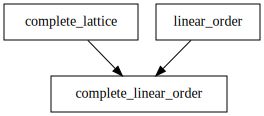

In [5]:
from graphviz import Digraph

g = Digraph(comment='Grundbegriffe')

e=[('complete_lattice', 'complete_linear_order'),
   ('linear_order', 'complete_linear_order')]
g.attr(shape='box')
for a,b in e: 
    g.node(a, shape='box')
    g.node(b, shape='box')
    g.edge(a,b)
g
